In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
import math

In [4]:
df = pd.read_csv('salary_data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company,state,at_headquarter,Age,python,R,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,39,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,13,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,58,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,25,1,0,0,0,1


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'employer_provided', 'salary', 'max_salary', 'min_salary',
       'avg_salary', 'Company', 'state', 'at_headquarter', 'Age', 'python',
       'R', 'spark', 'aws', 'excel'],
      dtype='object')

In [6]:
columns = df[['Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Hourly', 'employer_provided', 'state', 'at_headquarter', 'Age', 'python', 'R', 'spark', 'aws', 'excel', 'avg_salary']] 

In [7]:
final_df = pd.get_dummies(columns)

In [8]:
# splitting data for training and testing

from sklearn.model_selection import train_test_split

x = final_df.drop(['avg_salary'], axis=1)
y = final_df['avg_salary'].values

In [9]:
Y = final_df['avg_salary']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.8, random_state=42)

In [11]:
# algos used 
# linear regression
# multiple linear regression
# random forest classifier
# lasso regression

In [12]:
# linear regression

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [13]:
model1.score(x_test,y_test)

-133571767500056.94

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
np.mean(cross_val_score(model1, x_train, y_train, scoring='neg_mean_absolute_error',cv=3))

-24458830468.58673

In [16]:
# lasso regression model

from sklearn.linear_model import Lasso
model2 = Lasso(alpha=0.2)
model2.fit(x_train,y_train)

Lasso(alpha=0.2)

In [17]:
np.mean(cross_val_score(model2, x_train, y_train, scoring='neg_mean_absolute_error',cv=3))

-24.045509458453555

In [18]:
# deciding the ideal value of alpha

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    model = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error',cv=3)))

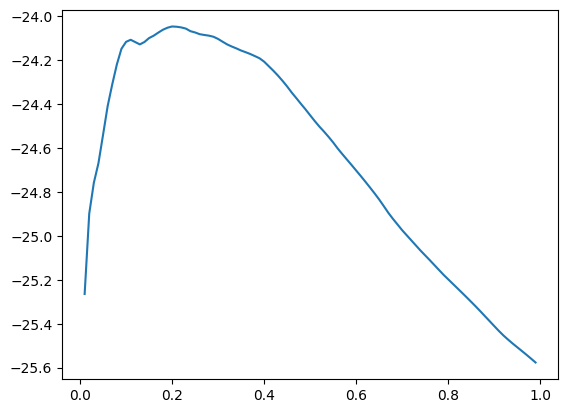

In [19]:
plt.plot(alpha,error)

In [20]:
error

[-25.264253399368712,
 -24.89790281138744,
 -24.757673556920604,
 -24.668421673700703,
 -24.539307330432834,
 -24.408454545829215,
 -24.309217448981297,
 -24.218507884868377,
 -24.147120431648414,
 -24.115633210300853,
 -24.10603189730273,
 -24.116617158344425,
 -24.12713280345153,
 -24.116155611986915,
 -24.098399981174172,
 -24.087512556434934,
 -24.073600193078704,
 -24.060478466861735,
 -24.051147582423923,
 -24.045509458453555,
 -24.04672666273726,
 -24.049827757632773,
 -24.05519354702741,
 -24.066976397872626,
 -24.072730974115377,
 -24.080592919287373,
 -24.08419876938693,
 -24.087262674766603,
 -24.092351092051036,
 -24.102269515842206,
 -24.11513570177927,
 -24.127502710409654,
 -24.137023323062962,
 -24.14559275950316,
 -24.155118464060678,
 -24.162722525231498,
 -24.170951203086947,
 -24.18046833190657,
 -24.190282999354153,
 -24.205633156165828,
 -24.226212491678904,
 -24.24684247899049,
 -24.268897309537223,
 -24.292887719300367,
 -24.31852516397088,
 -24.34644140265537,


In [21]:
df_error = pd.DataFrame(list(zip(alpha,error)), columns=['alpha', 'error'])

In [22]:
mx_alpha = df_error[df_error['error']==max(df_error['error'])]

In [23]:
mx_alpha.values

array([[  0.2       , -24.04550946]])

In [24]:
mx_alpha

,alpha,error
19,0.2,-24.045509


In [25]:
# the best value of alpha is 0.2

In [26]:
!pip install statsmodels

DEPRECATION: Loading egg at c:\users\ankit singh\appdata\local\programs\python\python311\lib\site-packages\apache_beam-2.50.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\ankit singh\appdata\local\programs\python\python311\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\ankit singh\appdata\local\programs\python\python311\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\ankit singh\appdata\local\programs\python\python311\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replac

In [27]:
# multiple linear regression


import statsmodels.api as sm
X = sm.add_constant(x)
model3 = sm.OLS(y.astype(float),X.astype(float))

In [28]:
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     5.480
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.22e-48
Time:                        20:41:02   Log-Likelihood:                -3473.8
No. Observations:                 742   AIC:                             7218.
Df Residuals:                     607   BIC:                             7840.
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                37.0335      8.824      4.197      0.000      19.705      54.362
Rating                                                7.7715      2.336      3.327      0.001       3.184      12.359
Hourly                                              -63.3199     10.988     -5.763      0.000     -84.898     -41.742
employer_provided                                    54.7569     14.022      3.905      0.000      27.220      82.294
at_headquarter                                        0.9534      3.181      0.300      0.764      -5.293       7.200
Age                                                  -0.0019      0.036     -0.052      0.959      -0.073       0.070
python                                               17.1923      2.927      5.873      0.000      11.443      22.941
R                                                    -6.0413     28.082     -0.215      0.830     -61.190      49.108
spark                                                -2.7316      3.411     -0.801      0.424      -9.431       3.968
aws                                                   6.9871      3.242      2.155      0.032       0.621      13.353
excel                                                -7.1201      2.715     -2.622      0.009     -12.453      -1.787
Size_-1                                               5.4462     10.670      0.510      0.610     -15.508      26.401
Size_1 to 50 employees                               -1.4178      7.982     -0.178      0.859     -17.094      14.258
Size_10000+ employees                                12.0456      6.907      1.744      0.082      -1.520      25.611
Size_1001 to 5000 employees                          13.0309      4.611      2.826      0.005       3.974      22.087
Size_201 to 500 employees                            -0.4784      4.731     -0.101      0.919      -9.769       8.813
Size_5001 to 10000 employees                          2.8346      6.559      0.432      0.666     -10.047      15.716
Size_501 to 1000 employees                           -1.2186      4.868     -0.250      0.802     -10.778       8.341
Size_51 to 200 employees                              1.0246      5.303      0.193      0.847      -9.389      11.439
Size_Unknown                                          5.7663     17.221      0.335      0.738     -28.054      39.586
Type of ownership_-1                                  5.4462     10.670      0.510      0.610     -15.508      26.401
Type of ownership_College / University               22.8131     21.018      1.085      0.278     -18.464      64.090
Type of ownership_Company - Private                   4.5162      6.336      0.713      0.476      -7.928      16.960
Type of ownersh

In [29]:
# random forest

from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()

In [34]:
model4.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
np.mean(cross_val_score(model4, x_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-18.500429721956866

In [39]:
# hyperparameter tuning with gridsearchCV


from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,500,10), 'criterion':('squared_error','absolute_error'), 'max_features':('sqrt','log2')}
gcv = GridSearchCV(model4, parameters, cv=3, scoring='neg_mean_absolute_error')

In [40]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('sqrt', 'log2'),
                         'n_estimators': range(10, 500, 10)},
             scoring='neg_mean_absolute_error')

In [62]:
gcv.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=260)

In [63]:
gcv.best_score_

-18.619435574108298

In [50]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred4 = model4.predict(x_test)

In [54]:
mean_absolute_error(y_test,y_pred1)

38278810.63844351

In [51]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred2)

25.93646731829811

In [52]:
mean_absolute_error(y_test,y_pred4)

15.520616635787775

In [53]:
mean_absolute_error(y_test,(y_pred2+y_pred4)/2)

20.158298059975575

In [47]:
# obviously combining the two models (random forest regressor and lasso regression) does not lower the mean absolute error, thus we will be going with the random forest regressor

In [57]:
# saving the model for future use

import pickle

pc = {'model':gcv.best_estimator_}
pickle.dump(pc, open('model_file' + ".p", "wb"))

In [60]:
# loading save model

file_name = 'model_file.p'
with open(file_name, 'rb') as f:
    data = pickle.load(f)
    loaded_model = data['model']

In [59]:
data

{'model': RandomForestRegressor(max_features='sqrt', n_estimators=260)}

In [61]:
loaded_model

RandomForestRegressor(max_features='sqrt', n_estimators=260)